# Introduction to neural network classification with TensorFlow

In this notebook we're goint to learn how to write neural networks for classification problems. 

A classification problem is where you try to classify something as one thing or another.

Types are:
* Binary classification
* Multicalss classification
* Multilabel classification

## Creating data do view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [ ]:
# Check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is hard to undestand right now, let's visualize it.

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:, 0], 'X1':X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


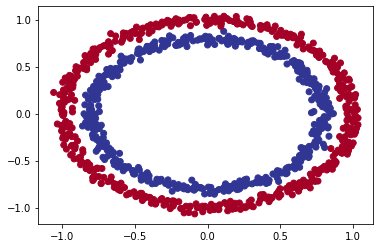

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# Check the shapes of X and y
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we have
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
As it was in regression problem:
1. Build a model
2. Compile a model
3. Fit the model

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

# 4. Evaluate a model
#model.evaluate()

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [ ]:
# Let's improve model trying to train it for longer
model_1.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4900
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/

Since we're working on a binary classification problem and our model gets around 50% accuracy... it's performing as it's been guessing.

So let's step things up a notch and add an extra layer.


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1), 
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

## Improving our model

Let's look into our bag of trick to see how we can improve our model.

1. Create a model - adding more layers or increasing the number of hidden units
2. Compiling a model - different optimization fuction
3. Fitting a model - training for longer

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [ ]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.48793232],
       [0.55887634],
       [0.56292886],
       [0.570507  ],
       [0.44141176],
       [0.5738824 ],
       [0.5576486 ],
       [0.48246634],
       [0.4775587 ],
       [0.5750227 ],
       [0.51484954],
       [0.53087693],
       [0.5643774 ],
       [0.45787302],
       [0.4505274 ],
       [0.4612992 ],
       [0.5405587 ],
       [0.46380943],
       [0.5479808 ],
       [0.50375724],
       [0.5063044 ],
       [0.58775485],
       [0.4590249 ],
       [0.49123308],
       [0.58321637],
       [0.5704261 ],
       [0.55239344],
       [0.46317348],
       [0.45773432],
       [0.45440987],
       [0.47872275],
       [0.57856065],
       [0.55546165],
       [0.4633913 ],
       [0.458492  ],
       [0.58986723],
       [0.57247394],
       [0.5297439 ],
       [0.4587057 ],
       [0.5109287 ],
       [0.499942  ],
       [0.5463086 ],
       [0.51099086],
       [0.4579724 ],
       [0.5223278 ],
       [0.53888077],
       [0.44872296],
       [0.544

 To visualize our model's predictions let's create a function 'plot_decision_boundary()', this function will:
 * Take in trained model, features (X) and labels (y)
 * Create a meshgrid of the different X values
 * Make predictions across meshigrid
 * Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary created by a model prediction on X
  """
  # Define the axis boundaries of plot and create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're goind to make predictions on them)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')

    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


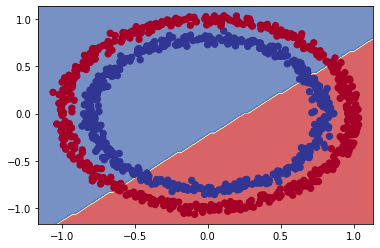

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X, 
                       y=y)

In [ ]:
# Let's see if our mdoel can be used for a regression problem

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split the regression data
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

Oh wait... we compiled our model for a binary classification problem.
But now we're working on a regression problem. Let's change the model to suit our data.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss funciton
model_3.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 9ms/step


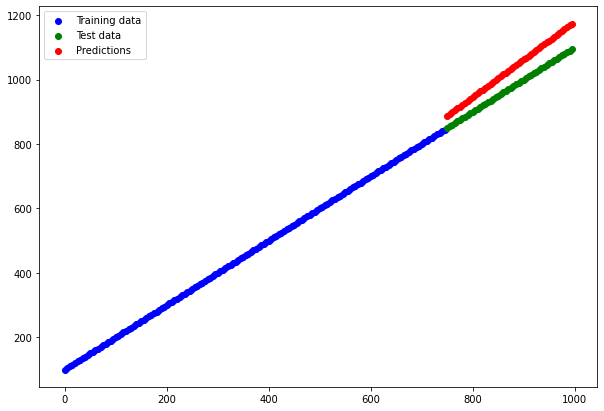

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 9ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

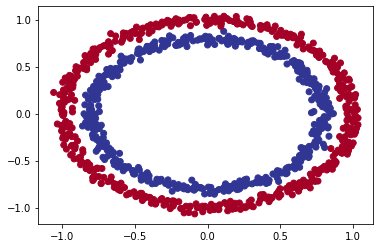

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


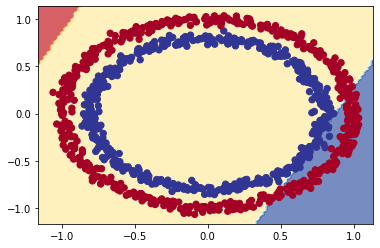

In [ ]:
# Check the decision boundaru for our latest model
plot_decision_boundary(model=model_4,
                       X=X, 
                       y=y)

Let's try to build our first neural network with a non-linear axtivation function.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9620 - accuracy: 0.4170
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8984 - accuracy: 0.4110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8595 - accuracy: 0.4110
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8580 - accuracy: 0.4110
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8575 - accuracy: 0.4110
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network model from TensorFlow playground in code

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classification


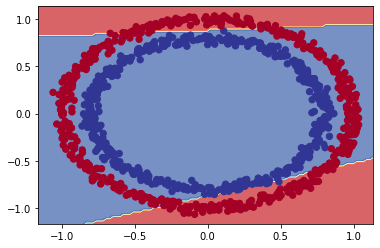

In [ ]:
# How do our model predictions look?
plot_decision_boundary(model_6, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

In [ ]:
# Evalate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9920


[0.04593365639448166, 0.9919999837875366]

313/313 [==============================] - 0s 1ms/step
doing binary classification


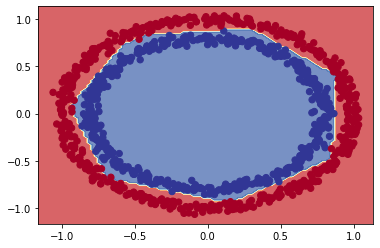

In [ ]:
# Plot the boundary
plot_decision_boundary(model_7, X, y)

Now we've discussed the concept of linear and non-linear functions, we're going to see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

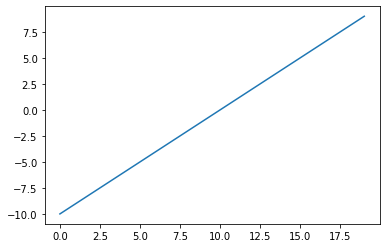

In [ ]:
# Visualize our toy tensor
plt.plot(A)

In [ ]:
# Let's start by replicatig sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

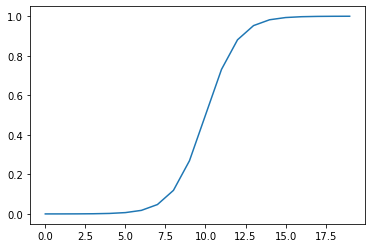

In [ ]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate ReLU function
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

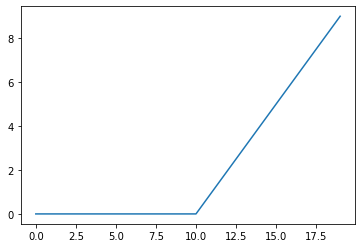

In [ ]:
# Plot our toy tensor transformed by ReLU
plt.plot(relu(A))

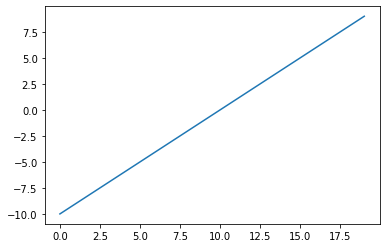

In [ ]:
# And linear function for completeness
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification 
So far we've been training and testing on the same dataset. However it is basically a sin in ML.

So let's create a training and test set.

In [ ]:
# Check how many examples we have
len(X)

1000

In [ ]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:

# LEt's recreate a model to fit on the training data and evaluate on the training data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [ ]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


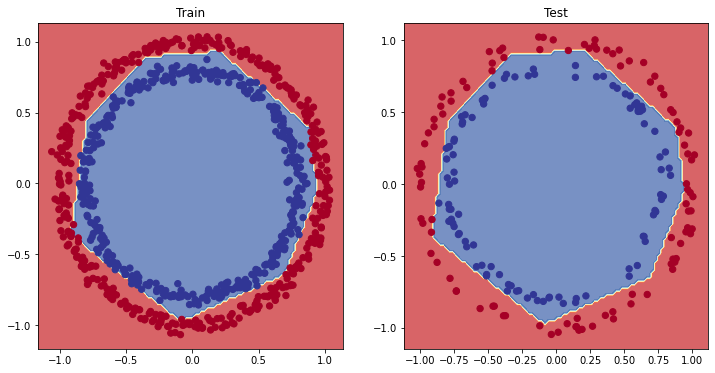

In [ ]:
# Plot the decison boundaries for the training and test set
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X_test, y_test)


## Plot the loss (or training) curves

In [ ]:
# Convert the history object into dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curves')

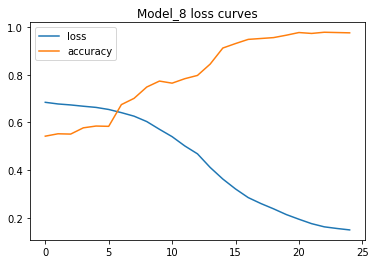

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

## Finding the best learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during training), we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality to your model as it's training
* Another model (we could use the same one as above, but we're building models here)
* A modified loss curves plot

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

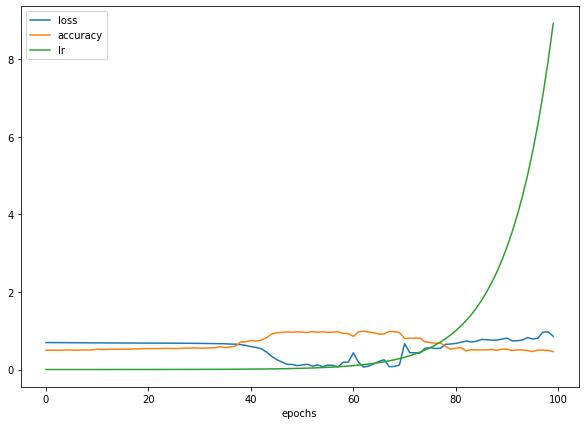

In [ ]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs')

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate v loss')

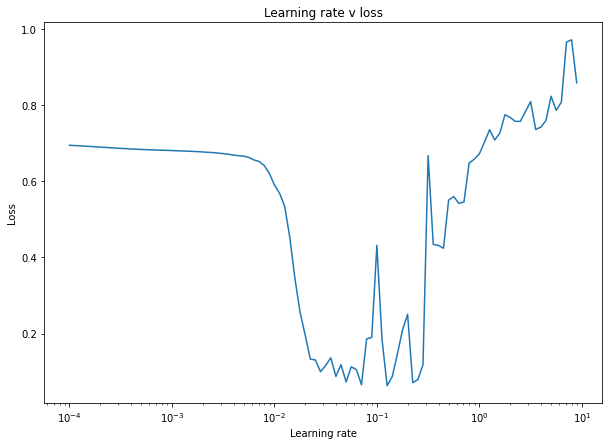

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate v loss')

In [ ]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

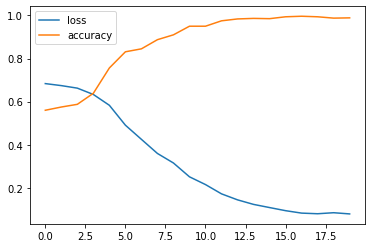

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=2e-2),
                 metrics=['accuracy'])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=20)

# Evaluate the model
print('Evaluation:')
model_10.evaluate(X_test, y_test)

# Plot the loss curves
pd.DataFrame(history_10.history).plot()

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


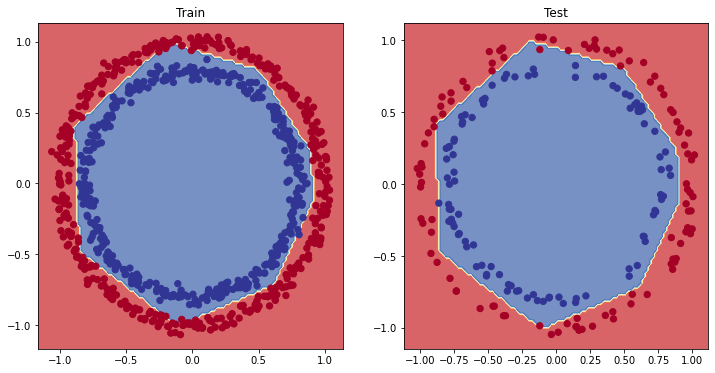

In [ ]:
# Plot the boundries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

## Classification evaluation metrics
* **Accuracy** - TP+TN / TP+TN+FP+FN - default metric for classification metrics, however it's not the best for unbalanced classes
* **Precision** - TP / TP+FP - higher the precision, the less is number of false positives
* **Recall** - TP / TP+FN - higher recall leads to less false negatives
* **F1 score** - 2* (precision * recall) / (precision + recall) - combination of precision and recall, usually a good overall metrics for a classification model
* **Confusion matrix** - when comparing prediciton to truth labels see where model gets confused. Hadr to use with large number of classes

## More classification evaluation methods

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on a test set: {loss:.3f}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on a test set: 0.057
Model accuracy on the test set: 99.00%


How about a confusion matrix?

In [ ]:
# Importing confusion matrix
from sklearn.metrics import confusion_matrix

# Make some predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.8526549e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622915e-01],
       [1.8126918e-02],
       [9.6829075e-01],
       [1.9746752e-02],
       [9.9967164e-01],
       [5.6459103e-04]], dtype=float32)

Oops... look like our predictions array has come out in **prediction probability** form. That's the standard output from sigmoid/softmax activation functions.

In [ ]:
# Convert prediction probabilities to inary format and view first 10
y_preds = tf.round(y_preds)
y_preds

<tf.Tensor: shape=(200,), dtype=float32, numpy=
array([1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.], dtype=float32)>

In [ ]:
# Create confusion matrix, again
confusion_matrix(y_test, y_preds)

array([[99,  2],
       [ 0, 99]])

## How about we prettify our confusion matrix?
The confusion matrix code we're about to write is a remix of a sklearn's confusion matrix 

In [15]:
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    '''
    Plots a confusion matrix for test and predicted values.
    Works for sure on binary classification
    '''

    import itertools
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import numpy as np

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to the classes
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title='Confusion matrix', 
          xlabel='Predicted Label', 
          ylabel='True Label', 
          xticks=np.arange(n_classes), 
          yticks=np.arange(n_classes), 
          xticklabels=labels,
          yticklabels=labels)

    # Set x-axis labels to the bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot some text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
              horizontalalignment='center',
              color='white' if cm[i, j]> threshold else "black",
              size=text_size)

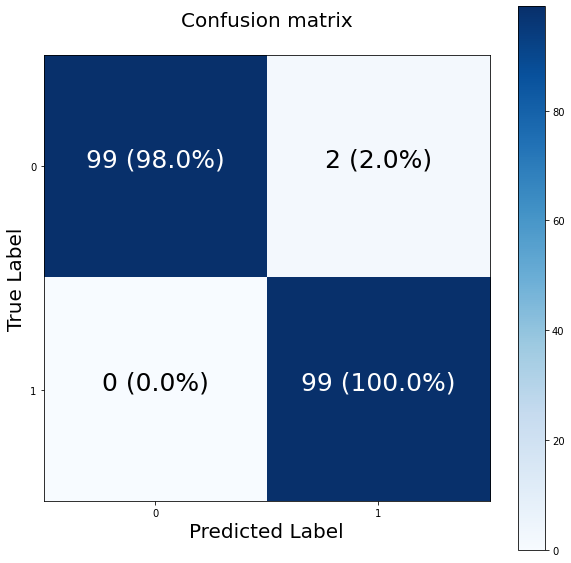

In [ ]:
plot_confusion_matrix(y_test, y_preds)

# Working with a larger example (multiclass classification)
When you have more than two classes as an option, it's known as a **multi-class classification**.

* This means if you have 3 different classes, it's a multiclass problem. 
* It also means that 100 different classes are a multiclass classification.

To practice, we're going to build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into train and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

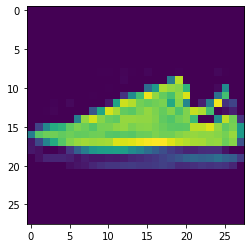

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[6])

In [13]:
# Create a small list so we can index onto our praining labels so they're human-readable
class_names = ['Tshirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len (class_names)

10

Text(0.5, 1.0, 'Pullover')

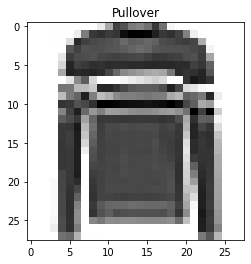

In [ ]:
# Plot an example image and it's label
index_of_choice = 5
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

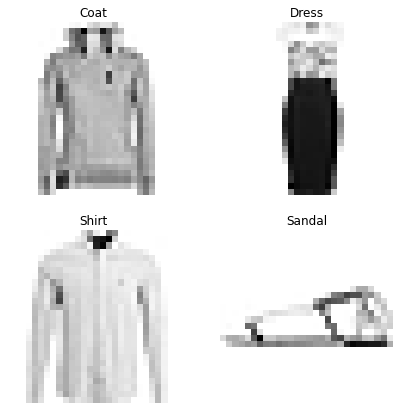

In [ ]:
# Plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For multi-class classification model, we can use a similar architecture to our binary classifiers, however we're going to tweak some things:
* input shape = 28 x 28 (shape of one image)
* output shape = 10 (one per class of clothing)
* loss function = tf.keras.losses.CategoricalCrossentropy()
  * If your labels are one-hot encoded use CategorialCrossentropy()
  * If your labels are integer form, use SparseCategoricalCrossentropy()
* output layer activation = Softmax

In [ ]:
# our data has to be flattened (from 28x28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_history = model_11.fit(train_data, 
                                train_labels, 
                                epochs=10, 
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1799 - accuracy: 0.1597 - val_loss: 1.8017 - val_accuracy: 0.2015
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7090 - accuracy: 0.2494 - val_loss: 1.6514 - val_accuracy: 0.2945
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6367 - accuracy: 0.2860 - val_loss: 1.6065 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6103 - accuracy: 0.2925 - val_loss: 1.6002 - val_accuracy: 0.3065
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5932 - accuracy: 0.3058 - val_loss: 1.5831 - val_accuracy: 0.3228
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5887 - accuracy: 0.3109 - val_loss: 1.5775 - val_accuracy: 0.2965
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5750 - accuracy: 0.3196 - val_loss: 1.5609 - val_accuracy:

<Figure size 720x720 with 0 Axes>

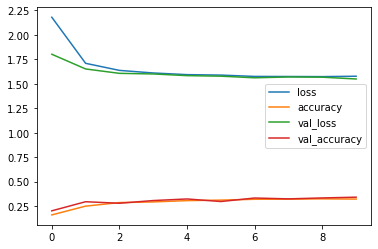

In [ ]:
import pandas as pd
plt.figure(figsize=(10,10))
pd.DataFrame(non_norm_history.history).plot()

In [ ]:
model_11.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.5488 - accuracy: 0.3410


[1.548835277557373, 0.3409999907016754]

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min and max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networs prefer data to be scaled (or normalized), this means they like to have numbers on the tensors they try to find the patterns in between 0 and 1.

In [2]:
# We can get our testing and training data between 0 and 1 by dividing by maximum value
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized, let's build model to find patterns

# Set random seed 
tf.random.set_seed(42)

# Create the model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(), 
                 metrics=['accuracy'])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

**NOTE** <br>
Neural networs tend to prefer data in numerical form as well as scaled/normalized (so values between 0 and 1)

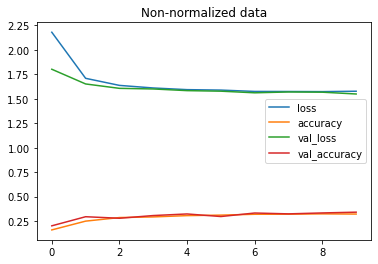

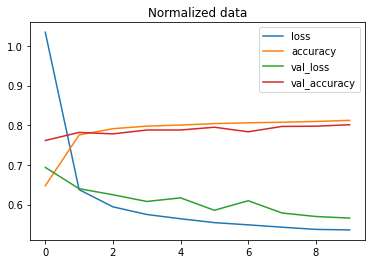

In [ ]:
# Plot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')

# Plot the normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized data')

**NOTE:**<br>
The same model with even slightly different data can produce *dramatically* different results. So when comparing models it's important to make sure you're comparing them on same criteria(e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
fit_lr_history = model_13.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

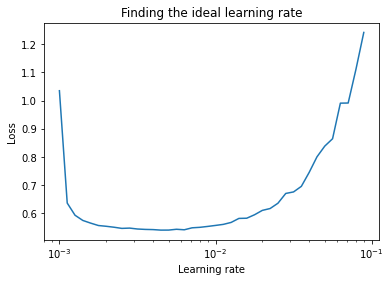

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * 10 ** ((np.arange(40)/20))

plt.semilogx(lrs, fit_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

In [ ]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                 metrics=['accuracy'])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating multi-class classification model
To evaluate our model, we could:
* Evaluete it's performance using other classification metrics (conf matrix?)
* Assess some of it's predictions (through visualization)
* Improve its results (by training or changing the architecture)
* Save and export it for use in application

Let's go through the top 2

In [ ]:
# Make some predictions
y_probs = model_14.predict(test_data_norm) # probs is short for prediction probabilities

# View the first 5 precitions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01],
       [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, 2.0516218e-07,
        1.5329195e-02, 2.4532527e-13, 2.4142891e-02, 1.1383710e-28,
        6.3271867e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, 3.3405882e-03,
        1.3249612e-05, 1.4383545e-21, 8.2791003e-06, 7.3238853e-18,
        5.4811920e-08, 4.9225709e-14],
       [7.5031370e-05, 9.9053699e-01, 4.2528902e-07, 9.2231650e-03,
        1.3623273e-04, 1.8276510e-18, 2.6808373e-05, 4.8125292e-14,
        1.4521634e-06, 2.2211717e-11],
       [7.2189897e-02, 1.5495709e-06, 2.5566906e-01, 1.0363110e-02,
        4.3541320e-02, 1.1069409e-13, 6.1693019e-01, 6.7544158e-23,
        1.3049176e-03, 1.2140382e-09]], dtype=float32)

**NOTE:**<br>
Remember to make prediction on the same kind of data your model was trained on (e.g. if you trained the model on normalized data, you should want to make predictions on normalized data, too).

In [ ]:
class_names

['Tshirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [28]:
# Showing a random test item and plotting the probabilities per each possible answer
def plot_image_probs(test_data, test_labels, y_probs, class_names):
  
  import numpy as np
  import matplotlib.pyplot as plt


  # Generate a random number
  item_no = np.random.randint(0, 100000) % len(test_data)
  print(f'Test set item number: {item_no}')

  # Set up the plots
  fig, ax = plt.subplots(figsize=(10,10))

  # Plotting the image
  plt.subplot(2, 1, 1)
  plt.imshow(test_data[item_no], cmap=plt.cm.binary)
  plt.title(f'This item is {class_names[test_labels[item_no]]}')
  plt.axis(False)

  # Plotting the probabilities
  plt.subplot(2, 1, 2)
  plt.bar(class_names, y_probs[item_no])

  for i in range(len(class_names)):
    plt.text(i, # x coordinate
            y_probs[item_no][i]+.01, # y coordinate
            str(f'{100 * y_probs[item_no][i]:.2f}%'), # tag to be printed
            ha='center') # placement

  # Creating the integer values of predictions
  y_preds = y_probs.argmax(axis=1)

  # Title color depending on the prediction being right or not
  if y_preds[item_no] == test_labels[item_no]:
    plt.title(f'Prediction is correct, this is a {class_names[y_preds[item_no]]}',
              color='green')
    
  else:
    plt.title(f'Prediction is wrong, this is not a {class_names[y_preds[item_no]]}, this is a {class_names[test_labels[item_no]]}',
              color='red')

In [24]:
plot_image_probs(test_data, test_labels, y_probs, class_names)

NameError: ignored

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

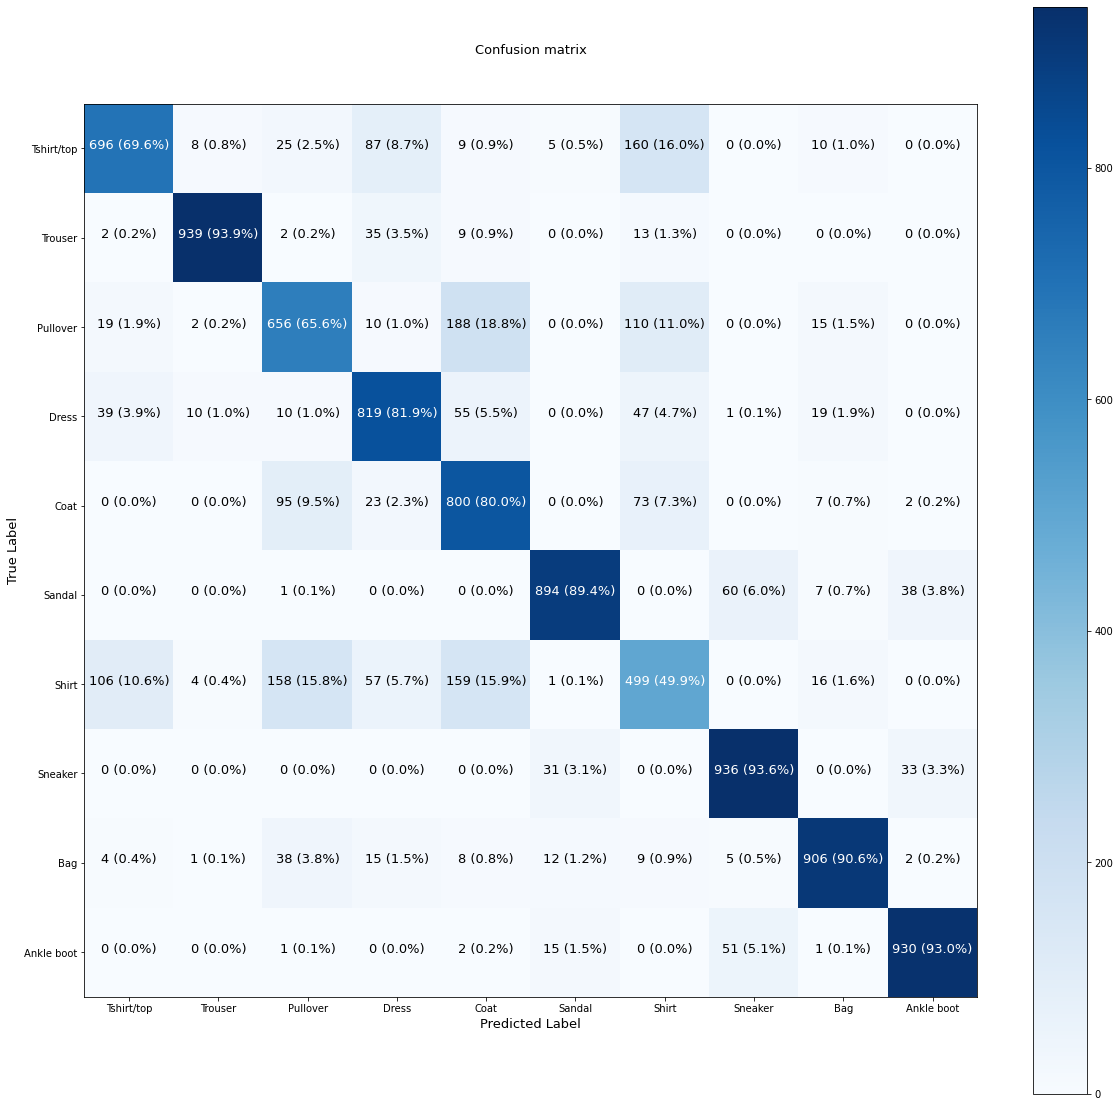

In [ ]:
plot_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds, 
                      classes=class_names,
                      figsize=(20, 20), 
                      text_size=13)

In [ ]:
# Importing metrics for evaluating the model
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [ ]:
# Checking the scores for model_14
# Accuracy score
print(f'Accuracy score: {100 * accuracy_score(test_labels, y_preds):.2f}%')

Accuracy score: 80.75%


In [ ]:
# Recall score
r_score = recall_score(test_labels, y_preds, average='weighted')
print(f'Recall score: {100 * r_score:.2f}%')

Recall score: 80.75%


In [ ]:
# F1 score
f1 = f1_score(test_labels, y_preds, average='weighted')
print(f'F1 score: {100 * f1:.2f}%')

F1 score: 80.71%


**NOTE**<br>
Often when working with images and other forms of visual data, it's a good idea to visualizte as much as possible to develop a further understanding of the data and the inputs and outputs of the model.

How about we create a function for:
* plot a random image
* make a prediction on said image
* label the plot with the truth label & the predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  '''
  Picks a random image, plots it and labels it with a prediction and truth label
  '''

  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.figure(figsize=(5,5))
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the colour of the titles depending on prediction being right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add xlabel information (prediction/true label)
  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red based on prediction

1/1 [==============================] - 0s 21ms/step


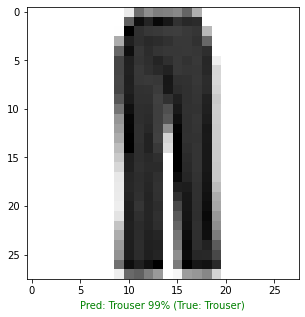

In [ ]:
# Check out a random image and it's prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # make predictions on the same type of data as trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particula layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.715027  , -0.06077112, -0.9976308 , -1.0484312 ],
        [ 0.27732143, -0.4715541 , -0.5291646 ,  0.02329262],
        [ 0.7752432 ,  0.5402756 , -1.128857  , -0.7426152 ],
        ...,
        [-0.39453375,  0.47628623, -0.22641547,  0.25505966],
        [-0.40515727,  0.6181007 ,  0.23928417, -0.503876  ],
        [ 0.23884544,  0.11606897, -0.1213136 ,  0.04352434]],
       dtype=float32), (784, 4))

In [ ]:
# Now let's check out the bias vector
biases, biases.shape

(array([ 2.4485679e-02, -6.1455613e-04, -2.7230152e-01,  8.1124908e-01],
       dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with weight matrix.<br>
The bias vector gets initialized at zeros (at least in the case of a TensorFlow Dense layer).<br>
The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
# Model architecture
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


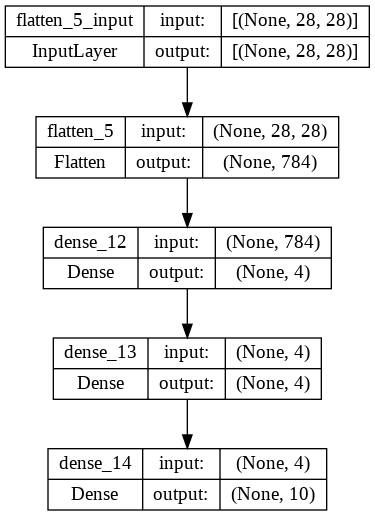

In [ ]:
# Another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model

# See the inputs and outputs for the model
plot_model(model_14, show_shapes=True)

In [5]:
# Maybe getting even better performance?

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_15 = model_15.fit(train_data_norm,
                          train_labels,
                          epochs=25,
                          batch_size=16,
                          validation_data=(test_data_norm, test_labels),
                          use_multiprocessing=True)

Epoch 1/25
3750/3750 [==============================] - 12s 3ms/step - loss: 0.6585 - accuracy: 0.7631 - val_loss: 0.5132 - val_accuracy: 0.8129
Epoch 2/25
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4656 - accuracy: 0.8324 - val_loss: 0.4796 - val_accuracy: 0.8273
Epoch 3/25
3750/3750 [==============================] - 9s 3ms/step - loss: 0.4256 - accuracy: 0.8476 - val_loss: 0.4333 - val_accuracy: 0.8435
Epoch 4/25
3750/3750 [==============================] - 10s 3ms/step - loss: 0.3997 - accuracy: 0.8556 - val_loss: 0.4382 - val_accuracy: 0.8415
Epoch 5/25
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3848 - accuracy: 0.8611 - val_loss: 0.4302 - val_accuracy: 0.8429
Epoch 6/25
3750/3750 [==============================] - 9s 3ms/step - loss: 0.3721 - accuracy: 0.8647 - val_loss: 0.4195 - val_accuracy: 0.8494
Epoch 7/25
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3633 - accuracy: 0.8670 - val_loss: 0.4154 - val_accura

In [6]:
# Evaluate the model
model_15.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4022 - accuracy: 0.8626


[0.4021790623664856, 0.8626000285148621]

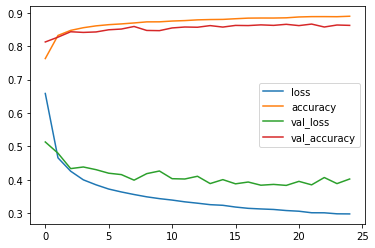

In [7]:
# Plot the loss curves
import pandas as pd
pd.DataFrame(history_15.history).plot()

In [8]:
hist_15 = pd.DataFrame(history_15.history)
hist_15.describe()

,loss,accuracy,val_loss,val_accuracy
count,25.000000,25.000000,25.000000,25.00000
mean,0.353400,0.870610,0.411500,0.85364
std,0.076314,0.026483,0.030684,0.01273
min,0.297554,0.763150,0.383021,0.81290
25%,0.310903,0.866983,0.388510,0.84740
50%,0.329707,0.879117,0.402191,0.85770
75%,0.363350,0.884650,0.419545,0.86250
max,0.658489,0.889967,0.513162,0.86650


In [10]:
# Make predictions with model_15
y_probs_15 = model_15.predict(test_data_norm)

313/313 [==============================] - 1s 3ms/step


In [11]:
# Convert prediction probabilities into integers
y_preds_15 = y_probs_15.argmax(axis=1)
y_preds_15

array([9, 2, 1, ..., 8, 1, 5])

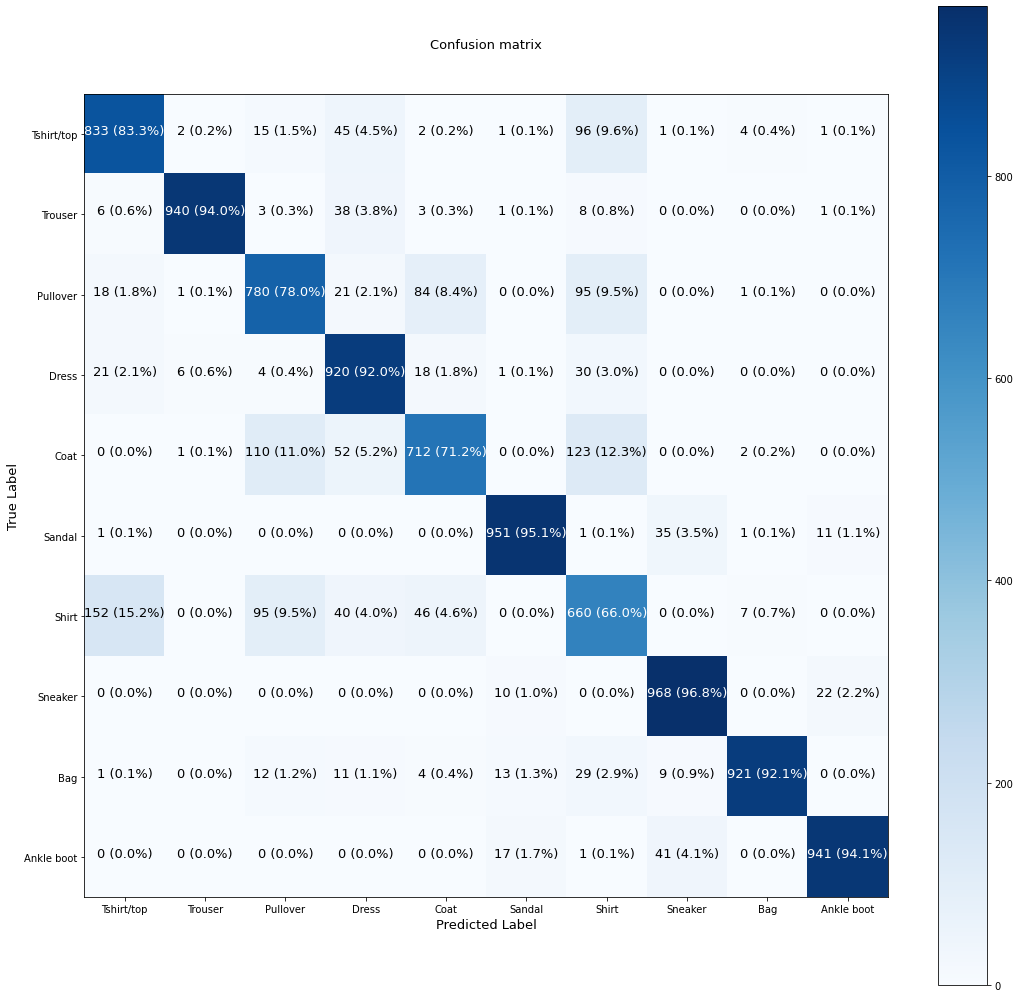

In [16]:
plot_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds_15,
                      classes=class_names,
                      figsize=(18,18),
                      text_size=13)

Test set item number: 8501


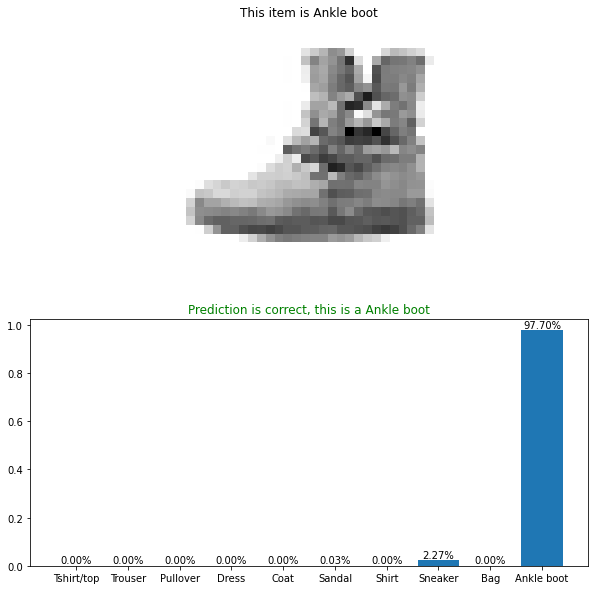

In [32]:
plot_image_probs(test_data, test_labels, y_probs_15, class_names)

In [33]:
model_15.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,274
Trainable params: 13,274
Non-trainable params: 0
_________________________________________________________________
